# Bank casestudy using Random Forest

# Step1:Reading and Understanding the data

In [1]:
#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Numpy and Pandas
import numpy as np
import pandas as pd

In [3]:
#Importing the data and see the head of our dataset
loan=pd.read_csv("S:/ds/Decision Trees/loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Step 2:Data Cleaning

In [7]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
#columnwise Null count 
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
               'out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
               'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','application_type'], axis=1)

In [11]:
#columnwise Null count 
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [12]:
# Code for dropping the columns that have high null values and are not required for further analysis
loan= loan.loc[:,round(100*(loan.isnull().sum()/len(loan.index)),2) < 80]

In [13]:
# Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
mths_since_last_delinq        64.66
initial_list_status            0.00
total_pymnt                 

In [14]:
loan =loan.drop(['member_id','id','acc_now_delinq','chargeoff_within_12_mths','pymnt_plan','initial_list_status','delinq_amnt','pub_rec_bankruptcies','tax_liens','collections_12_mths_ex_med','policy_code','url','emp_title','zip_code','addr_state','title','desc'], axis=1)

In [15]:
# Verifying Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
dti                        0.00
mths_since_last_delinq    64.66
total_pymnt                0.00
dtype: float64

In [16]:
# Removing the rows with the null values of the following column since we need to do analysis on them
loan= loan[~pd.isnull(loan['mths_since_last_delinq'])]
loan = loan[~pd.isnull(loan['emp_length'])]

In [17]:
# Verifying Null value percentage in each column
round(100*(loan.isnull().sum(axis=0))/len(loan.index),2)

loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
int_rate                  0.0
installment               0.0
grade                     0.0
sub_grade                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
verification_status       0.0
issue_d                   0.0
loan_status               0.0
purpose                   0.0
dti                       0.0
mths_since_last_delinq    0.0
total_pymnt               0.0
dtype: float64

In [18]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,4 years,RENT,42000.0,Not Verified,Dec-11,Fully Paid,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,60 months,16.77%,123.65,D,D2,2 years,RENT,50004.0,Not Verified,Dec-11,Charged Off,other,13.97,20.0,1609.120000


In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
loan_amnt                 13690 non-null int64
funded_amnt               13690 non-null int64
funded_amnt_inv           13690 non-null float64
term                      13690 non-null object
int_rate                  13690 non-null object
installment               13690 non-null float64
grade                     13690 non-null object
sub_grade                 13690 non-null object
emp_length                13690 non-null object
home_ownership            13690 non-null object
annual_inc                13690 non-null float64
verification_status       13690 non-null object
issue_d                   13690 non-null object
loan_status               13690 non-null object
purpose                   13690 non-null object
dti                       13690 non-null float64
mths_since_last_delinq    13690 non-null float64
total_pymnt               13690 non-null float64
dtypes: float64(6), int

In [20]:
loan.shape

(13690, 18)

# Step 3:Split the data into test and train data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=loan.drop(['term','loan_status'],axis=1)

In [23]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,15.27%,347.98,C,C4,4 years,RENT,42000.0,Not Verified,Dec-11,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,11.71%,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,Dec-11,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,16.77%,123.65,D,D2,2 years,RENT,50004.0,Not Verified,Dec-11,other,13.97,20.0,1609.120000


In [24]:
y=loan['loan_status']

In [25]:
y.head()

3      Fully Paid
4         Current
16     Fully Paid
18     Fully Paid
27    Charged Off
Name: loan_status, dtype: object

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [27]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,mths_since_last_delinq,total_pymnt
8907,9000,9000,9000.000000,13.99%,307.56,C,C3,3 years,RENT,48000.0,Source Verified,Aug-11,major_purchase,22.63,7.0,11071.936700
24642,5800,5800,5800.000000,19.79%,152.99,F,F5,5 years,MORTGAGE,26004.0,Verified,Oct-10,debt_consolidation,13.29,19.0,6965.064979
27336,5500,5500,5373.852902,11.12%,180.38,B,B3,1 year,RENT,33280.0,Source Verified,Jul-10,moving,12.48,64.0,6494.400290
37204,4000,4000,4000.000000,13.47%,135.70,C,C4,5 years,RENT,20000.0,Source Verified,Mar-09,house,15.06,20.0,4884.773702
24725,3600,3600,3600.000000,18.67%,92.74,F,F2,8 years,OWN,52800.0,Source Verified,Oct-10,other,10.59,21.0,5076.114545


In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
loan_amnt                 13690 non-null int64
funded_amnt               13690 non-null int64
funded_amnt_inv           13690 non-null float64
term                      13690 non-null object
int_rate                  13690 non-null object
installment               13690 non-null float64
grade                     13690 non-null object
sub_grade                 13690 non-null object
emp_length                13690 non-null object
home_ownership            13690 non-null object
annual_inc                13690 non-null float64
verification_status       13690 non-null object
issue_d                   13690 non-null object
loan_status               13690 non-null object
purpose                   13690 non-null object
dti                       13690 non-null float64
mths_since_last_delinq    13690 non-null float64
total_pymnt               13690 non-null float64
dtypes: float64(6), int

In [29]:
loan.shape

(13690, 18)

# Step 4:Data Preparation

In [30]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
loan_categorical=loan.select_dtypes(include=['object'])
loan_categorical.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other
16,36 months,15.27%,C,C4,4 years,RENT,Not Verified,Dec-11,Fully Paid,home_improvement
18,36 months,11.71%,B,B3,1 year,MORTGAGE,Verified,Dec-11,Fully Paid,medical
27,60 months,16.77%,D,D2,2 years,RENT,Not Verified,Dec-11,Charged Off,other


In [31]:
# appky label encoder to lead_categorical

le=preprocessing.LabelEncoder()
loan_categorical=loan_categorical.apply(le.fit_transform)
loan_categorical.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,0,98,2,10,1,4,1,13,2,9
4,1,73,1,9,0,4,1,13,1,9
16,0,156,2,13,4,4,0,13,2,4
18,0,45,1,7,0,0,2,13,2,7
27,1,193,3,16,2,4,0,13,0,9


In [32]:
# concat lead_categorical with original lead

loan = loan.drop(loan_categorical.columns, axis=1)
loan = pd.concat([loan, loan_categorical], axis=1)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,total_pymnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,10000,10000,10000.0,339.31,49200.0,20.00,35.0,12231.890000,0,98,2,10,1,4,1,13,2,9
4,3000,3000,3000.0,67.79,80000.0,17.94,38.0,3513.330000,1,73,1,9,0,4,1,13,1,9
16,10000,10000,10000.0,347.98,42000.0,18.60,61.0,12527.150000,0,156,2,13,4,4,0,13,2,4
18,6000,6000,6000.0,198.46,84000.0,18.44,8.0,7167.072893,0,45,1,7,0,0,2,13,2,7
27,5000,5000,5000.0,123.65,50004.0,13.97,20.0,1609.120000,1,193,3,16,2,4,0,13,0,9


In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
loan_amnt                 13690 non-null int64
funded_amnt               13690 non-null int64
funded_amnt_inv           13690 non-null float64
installment               13690 non-null float64
annual_inc                13690 non-null float64
dti                       13690 non-null float64
mths_since_last_delinq    13690 non-null float64
total_pymnt               13690 non-null float64
term                      13690 non-null int32
int_rate                  13690 non-null int32
grade                     13690 non-null int32
sub_grade                 13690 non-null int32
emp_length                13690 non-null int32
home_ownership            13690 non-null int32
verification_status       13690 non-null int32
issue_d                   13690 non-null int32
loan_status               13690 non-null int32
purpose                   13690 non-null int32
dtypes: float64(6), int32(10), in

# Step 5:Model Building

In [34]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [35]:
# Putting feature variable to X
X = loan.drop('loan_status',axis=1)

# Putting response variable to y
y = loan['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##### Default hyperparameters

In [36]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
#making Predictions
predictions=rfc.predict(X_test)

In [39]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [40]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       609
           1       0.22      0.06      0.09       107
           2       0.93      0.99      0.96      3391

   micro avg       0.93      0.93      0.93      4107
   macro avg       0.70      0.59      0.62      4107
weighted avg       0.91      0.93      0.91      4107



In [41]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 450    1  158]
 [   2    6   99]
 [  28   20 3343]]


In [42]:
print(accuracy_score(y_test,predictions))

0.9250060871682493


# Hyperparameter tuning

### Tuning max_depth

In [43]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [44]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [45]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067911,0.005273,0.005380,0.001956,2,{'max_depth': 2},0.822732,0.823161,0.823069,0.823591,...,0.823124,0.000275,4,0.823092,0.822985,0.823008,0.823269,0.823008,0.823072,0.000105
1,0.145203,0.006994,0.006113,0.002912,7,{'max_depth': 7},0.896246,0.886281,0.880480,0.896660,...,0.890535,0.006252,3,0.906980,0.897469,0.899048,0.901265,0.906874,0.902327,0.003945
2,0.204763,0.009330,0.010300,0.001894,12,{'max_depth': 12},0.918144,0.914450,0.905010,0.919102,...,0.914536,0.005033,2,0.962035,0.959040,0.954089,0.962828,0.962045,0.960007,0.003231
3,0.224252,0.007609,0.008335,0.000941,17,{'max_depth': 17},0.924400,0.910798,0.914927,0.921190,...,0.917875,0.004742,1,0.990868,0.992173,0.989566,0.991000,0.992305,0.991182,0.000999


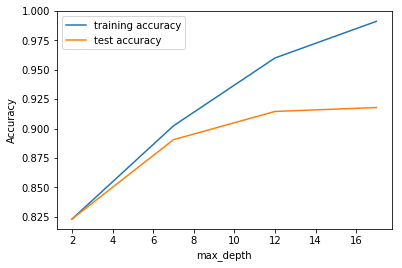

In [46]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimaters

In [47]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.862643,0.024409,0.036439,0.003290,100,{'n_estimators': 100},0.856100,0.857068,0.856472,0.857516,...,0.856830,0.000493,4,0.861709,0.859901,0.862528,0.856528,0.860441,0.860221,0.002065
1,4.451575,0.268087,0.174095,0.014124,500,{'n_estimators': 500},0.857143,0.857068,0.861169,0.854906,...,0.857873,0.002112,3,0.863666,0.859901,0.864093,0.855354,0.864093,0.861421,0.003419
2,8.165642,0.432709,0.322052,0.018885,900,{'n_estimators': 900},0.856621,0.857590,0.859603,0.858559,...,0.858291,0.001068,2,0.862100,0.860292,0.864354,0.856919,0.863571,0.861447,0.002654
3,12.574690,0.694929,0.531570,0.058730,1300,{'n_estimators': 1300},0.856621,0.856547,0.859603,0.859603,...,0.858499,0.001576,1,0.862622,0.859118,0.862658,0.859267,0.863832,0.861500,0.001934


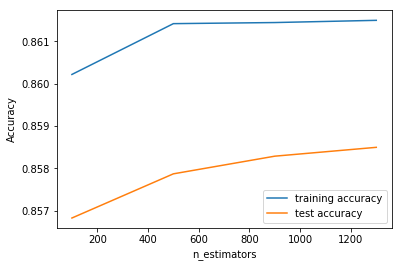

In [50]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [51]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features':[4,8,14]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [52]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097135,0.003391,0.005447,0.000730,4,{'max_features': 4},0.857143,0.864893,0.853862,0.858038,...,0.854951,0.007927,3,0.857665,0.871250,0.857441,0.854311,0.840876,0.856309,0.009680
1,0.194166,0.023681,0.006043,0.001731,8,{'max_features': 8},0.879041,0.875326,0.882568,0.881002,...,0.879370,0.002431,2,0.885192,0.883120,0.885875,0.877918,0.882744,0.882970,0.002792
2,0.269732,0.019729,0.008460,0.005615,14,{'max_features': 14},0.895203,0.901408,0.898747,0.902401,...,0.898779,0.002821,1,0.903457,0.902165,0.904917,0.901265,0.900613,0.902484,0.001546


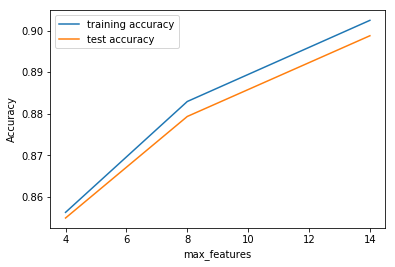

In [53]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning min_samples_leaf

In [54]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.141444,0.016512,0.008515,0.002786,100,{'min_samples_leaf': 100},0.868092,0.868545,0.847599,0.862213,...,0.860586,0.007847,1,0.872277,0.869293,0.854441,0.862397,0.857571,0.863196,0.006761
1,0.141089,0.007221,0.008415,0.002485,150,{'min_samples_leaf': 150},0.860271,0.849244,0.832463,0.855428,...,0.852551,0.011365,2,0.866667,0.851161,0.837877,0.856658,0.868919,0.856256,0.011249
2,0.171321,0.066393,0.010434,0.002633,200,{'min_samples_leaf': 200},0.822732,0.823161,0.861691,0.847599,...,0.837107,0.015237,3,0.823092,0.822985,0.861223,0.847789,0.831094,0.837237,0.015018
3,0.110249,0.009536,0.007326,0.001847,250,{'min_samples_leaf': 250},0.822732,0.823161,0.823069,0.823069,...,0.823542,0.001078,4,0.823092,0.822985,0.823138,0.823008,0.827442,0.823933,0.001756
4,0.097432,0.005410,0.006261,0.001725,300,{'min_samples_leaf': 300},0.822732,0.823161,0.823069,0.823069,...,0.823020,0.000148,5,0.823092,0.822985,0.823008,0.823008,0.823008,0.823020,0.000037


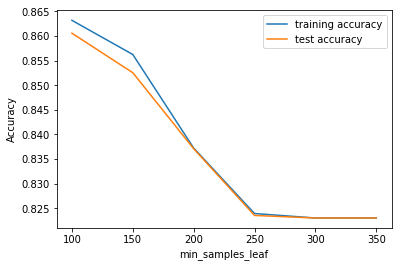

In [56]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples-split

In [57]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191005,0.009269,0.010973,0.002947,200,{'min_samples_split': 200},0.885297,0.904017,0.885177,0.905532,...,0.893770,0.009092,1,0.900718,0.908296,0.895005,0.900743,0.894352,0.899823,0.005032
1,0.180548,0.012551,0.009034,0.002321,250,{'min_samples_split': 250},0.871220,0.884716,0.894572,0.900313,...,0.883231,0.013317,2,0.884149,0.889251,0.904526,0.895005,0.871658,0.888918,0.010967
2,0.166227,0.013353,0.008989,0.001146,300,{'min_samples_split': 300},0.884254,0.871674,0.863779,0.895094,...,0.878222,0.010734,3,0.894325,0.878424,0.879484,0.891874,0.882223,0.885266,0.006561
3,0.146146,0.004703,0.006083,0.001784,350,{'min_samples_split': 350},0.866006,0.868023,0.872129,0.877871,...,0.867891,0.007435,4,0.873059,0.874380,0.879484,0.874266,0.863702,0.872978,0.005138
4,0.143919,0.006511,0.008213,0.001748,400,{'min_samples_split': 400},0.866528,0.847157,0.866388,0.868998,...,0.862152,0.007862,5,0.866536,0.851291,0.864745,0.863441,0.866832,0.862569,0.005772


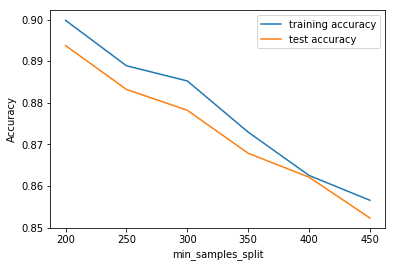

In [59]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid search to find optimal Hyperparameters

In [60]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [61]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [62]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8923092977147031 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


##### Fitting the final model with the best Parameters Obtained from grid search

In [63]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [64]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
# predict
predictions = rfc.predict(X_test)

In [66]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       609
           1       0.00      0.00      0.00       107
           2       0.90      1.00      0.95      3391

   micro avg       0.91      0.91      0.91      4107
   macro avg       0.63      0.52      0.56      4107
weighted avg       0.89      0.91      0.89      4107



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
print(confusion_matrix(y_test,predictions))

[[ 342    0  267]
 [   0    0  107]
 [   0    0 3391]]
